In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt("data.txt", names=True)
x = data['x']
f = data['f']

In [3]:
def divided_diff(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

In [4]:
def p(coef, f, y):
    n = len(f) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n - k] + (y - f[n - k]) * p
    return p

In [14]:
a_s = divided_diff(f, x)[0, :]
p(a_s, f, 0)

0.7911869900846572

In [7]:
def func(x):
    return x**2 - np.sin(x)

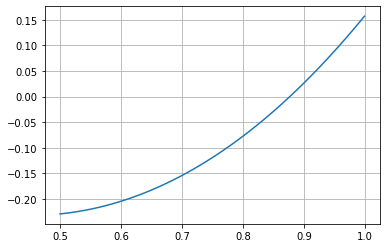

In [11]:
xrg = np.arange(0.5, 1, 0.001)
plt.grid(True)
plt.plot(xrg, func(xrg))

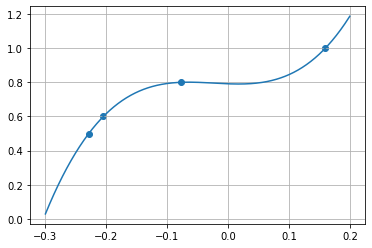

In [13]:
yrg = np.arange(-0.3, 0.2, 0.001)
plt.grid(True)
plt.plot(yrg, p(a_s, f, yrg))
plt.scatter(f, x)